In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

## Import Data

In [2]:
# Import Inventory data and Sales data
## Inventory data
inventory_data = pd.read_excel(r"Dataset.xlsx", sheet_name='inventory')
inventory_data.head(10)


,product_id,product_name,total_inventory,BGI,DNA,DNG,GLA,HCM,HNO,HYE,LAN,QNA,QNH,TBH,THA,TNG,VPH,VTB
0,10W7740S2,Short-sleeve shirt,191,14,17,15,11,12,11,15,16,13,11,11,10,12,11,12
1,10W7075S2,Short-sleeve shirt,174,11,16,10,6,9,11,11,14,11,15,11,10,15,10,14
2,20W4085S2,Shorts,167,10,13,8,7,8,10,13,14,11,16,9,10,14,8,16
3,10W7740S3,Short-sleeve shirt,158,10,17,9,9,8,10,10,11,11,12,9,8,10,8,16
4,10W7075S3,Short-sleeve shirt,152,10,10,5,7,9,8,11,11,10,11,8,10,12,15,15
5,31W3580S2,Knit dress,152,9,12,12,1,11,11,13,11,11,10,8,8,15,10,10
6,31W3555S2,Knit dress,145,8,14,11,5,8,7,7,11,12,12,9,8,12,8,13
7,20M5070S3,Shorts,130,13,0,21,20,3,12,0,3,0,0,0,13,18,19,8
8,11W8040S1,Long-sleeve shirt,129,3,14,11,1,7,3,4,8,2,9,12,8,4,17,26
9,20W4085S1,Shorts,125,10,8,8,5,4,7,11,9,9,10,6,8,10,10,10


In [3]:
## Sales data
sales_data = pd.read_excel(r"Dataset.xlsx", sheet_name='sales')
sales_data.head(10)

,store,order_time,order_id,customer_name,product_id,quantity
0,QNH,2020-01-01,QNH01342,NNPN,35W7885S5,1
1,HYE,2020-01-01,HYE01588,CTBV,33W6741S4,1
2,DNA,2020-01-01,DNA02155,MT,35W3595S3,1
3,HNO,2020-01-01,HNO01122,MM,22M5734S4,1
4,VTB,2020-01-01,VTB01351,MH,20M5070S3,1
5,TBH,2020-01-01,TBH01087,LAT,35W3595S1,1
6,VTB,2020-01-01,VTB01352,LAT,10W3602S3,1
7,HYE,2020-01-01,HYE01590,LLNH,10W3514S2,1
8,QNH,2020-01-01,QNH01346,NH,35W7833S2,1
9,VPH,2020-01-01,VPH01320,NTH,10W3517S1,1


In [4]:
# Declare stores in list that sell the main product line - women fashion
stores = ['BGI', 'DNA', 'DNG', 'GLA', 'HCM', 'HNO', 'HYE', 'LAN', 'QNA', 'QNH', 'TBH', 'THA', 'TNG', 'VPH', 'VTB']

# Declare stores in list that sell secondary product line - men fashion
men_stores = ['BGI', 'DNG', 'GLA', 'HCM', 'HNO', 'LAN', 'THA', 'TNG', 'VPH', 'VTB']

## Process data

In [5]:
# Extract 'product_code', 'size', 'product_line' and 'product_group' from 'product_id'
inventory_data['product_code'] = inventory_data['product_id'].str[0:7]
inventory_data['size'] = inventory_data['product_id'].str[8:9]
inventory_data['product_line'] = inventory_data['product_id'].str[2:3]
inventory_data['product_group'] = inventory_data['product_id'].str[0:2]
inventory_data.head(10)

,product_id,product_name,total_inventory,BGI,DNA,DNG,GLA,HCM,HNO,HYE,...,QNH,TBH,THA,TNG,VPH,VTB,product_code,size,product_line,product_group
0,10W7740S2,Short-sleeve shirt,191,14,17,15,11,12,11,15,...,11,11,10,12,11,12,10W7740,2,W,10
1,10W7075S2,Short-sleeve shirt,174,11,16,10,6,9,11,11,...,15,11,10,15,10,14,10W7075,2,W,10
2,20W4085S2,Shorts,167,10,13,8,7,8,10,13,...,16,9,10,14,8,16,20W4085,2,W,20
3,10W7740S3,Short-sleeve shirt,158,10,17,9,9,8,10,10,...,12,9,8,10,8,16,10W7740,3,W,10
4,10W7075S3,Short-sleeve shirt,152,10,10,5,7,9,8,11,...,11,8,10,12,15,15,10W7075,3,W,10
5,31W3580S2,Knit dress,152,9,12,12,1,11,11,13,...,10,8,8,15,10,10,31W3580,2,W,31
6,31W3555S2,Knit dress,145,8,14,11,5,8,7,7,...,12,9,8,12,8,13,31W3555,2,W,31
7,20M5070S3,Shorts,130,13,0,21,20,3,12,0,...,0,0,13,18,19,8,20M5070,3,M,20
8,11W8040S1,Long-sleeve shirt,129,3,14,11,1,7,3,4,...,9,12,8,4,17,26,11W8040,1,W,11
9,20W4085S1,Shorts,125,10,8,8,5,4,7,11,...,10,6,8,10,10,10,20W4085,1,W,20


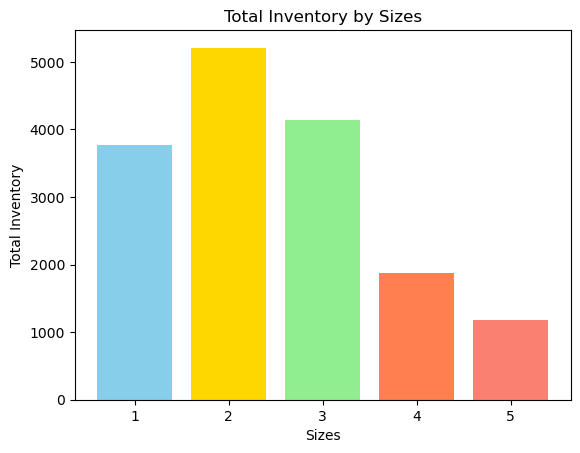

In [6]:
# Column chart shows Total Inventory by Sizes
size_inventory = inventory_data.groupby('size').agg({'total_inventory':sum}).reset_index()

plt.bar(size_inventory['size'], size_inventory['total_inventory'], 
        color=['skyblue','gold', 'lightgreen', 'coral', 'salmon'])

plt.title('Total Inventory by Sizes')
plt.xlabel('Sizes')
plt.ylabel('Total Inventory')
plt.show()

In [7]:
# Process Sales data
## Extract 'product_code', 'size', 'product_line' and 'product_group' from 'product_id'
sales_data['product_code'] = sales_data['product_id'].str[0:7]
sales_data['product_group'] = sales_data['product_id'].str[0:2]
sales_data['product_line'] = sales_data['product_id'].str[2:3]
sales_data.head(10)

,store,order_time,order_id,customer_name,product_id,quantity,product_code,product_group,product_line
0,QNH,2020-01-01,QNH01342,NNPN,35W7885S5,1,35W7885,35,W
1,HYE,2020-01-01,HYE01588,CTBV,33W6741S4,1,33W6741,33,W
2,DNA,2020-01-01,DNA02155,MT,35W3595S3,1,35W3595,35,W
3,HNO,2020-01-01,HNO01122,MM,22M5734S4,1,22M5734,22,M
4,VTB,2020-01-01,VTB01351,MH,20M5070S3,1,20M5070,20,M
5,TBH,2020-01-01,TBH01087,LAT,35W3595S1,1,35W3595,35,W
6,VTB,2020-01-01,VTB01352,LAT,10W3602S3,1,10W3602,10,W
7,HYE,2020-01-01,HYE01590,LLNH,10W3514S2,1,10W3514,10,W
8,QNH,2020-01-01,QNH01346,NH,35W7833S2,1,35W7833,35,W
9,VPH,2020-01-01,VPH01320,NTH,10W3517S1,1,10W3517,10,W


In [8]:
# Process Sales data to get Sales quantity of each 'product_code' in stores

## Transform Sales data into Wide data 
sales = sales_data.pivot_table(index = ['product_code','product_group','product_line'], 
                               columns = 'store', values = 'quantity', aggfunc = 'sum', fill_value = 0).reset_index()

## Create a Dataframe contains all 'product_code' are stocking in stores
inventory_code = inventory_data[['product_code','product_line','product_group']].drop_duplicates()

## Merge together 
product_sales = inventory_code.merge(sales, on = ['product_code','product_line','product_group'], 
                                       how ='left').fillna(0)
product_sales.head(10)

,product_code,product_line,product_group,BGI,DNA,DNG,GLA,HCM,HNO,HYE,LAN,QNA,QNH,TBH,THA,TNG,VPH,VTB
0,10W7740,W,10,19,29,13,0,10,4,13,14,5,18,6,15,18,14,14
1,10W7075,W,10,15,23,21,7,7,5,15,6,6,8,2,8,10,2,3
2,20W4085,W,20,15,24,11,2,10,7,18,4,13,6,8,12,8,13,9
3,31W3580,W,31,17,29,16,2,6,7,10,6,14,23,10,12,13,8,16
4,31W3555,W,31,9,21,15,1,4,11,24,11,14,22,9,12,34,9,9
5,20M5070,M,20,12,0,19,4,9,13,0,18,0,0,0,22,6,13,15
6,11W8040,W,11,6,4,4,2,10,1,11,1,4,2,1,1,11,3,5
7,10M5041,M,10,8,0,10,2,6,1,0,8,0,0,0,7,7,6,3
8,11W8979,W,11,4,9,3,0,2,4,4,3,2,5,3,2,0,8,12
9,27W7702,W,27,6,13,7,0,3,8,21,8,14,11,6,12,14,11,14


## Rank stores by their sales

 I sorted the stores by decreasing sales volume for each Product Code. My idea is to use these sorted lists to allocate the Product Code to the stores that are most likely to sell.

However, in some cases where stores have the same sales quantity or 0 sales quantity, the arrangement of stores will default to alphabetical order based on the first character of the store code. This could cause an imbalance and may not be accurate, as stores with codes that begin with letters later in the alphabet will be pushed to the end of the sorted list.

To solve this problem, I use an additional criterion, which is based on the sales quantity of each Product Group, to refine the sorting conditions. The heatmap graph below shows the sales volume of stores for each Product Group. For example, the QNH store sells well in Product Group 31 - Knit dress, as indicated by the darker colors, whereas the GLA store, which appears earlier alphabetically, has lower sales for this group. Adding this filter makes the sorting more accurate because it is based on the stores' ability to sell according to each "Product Group" rather than alphabetical order.

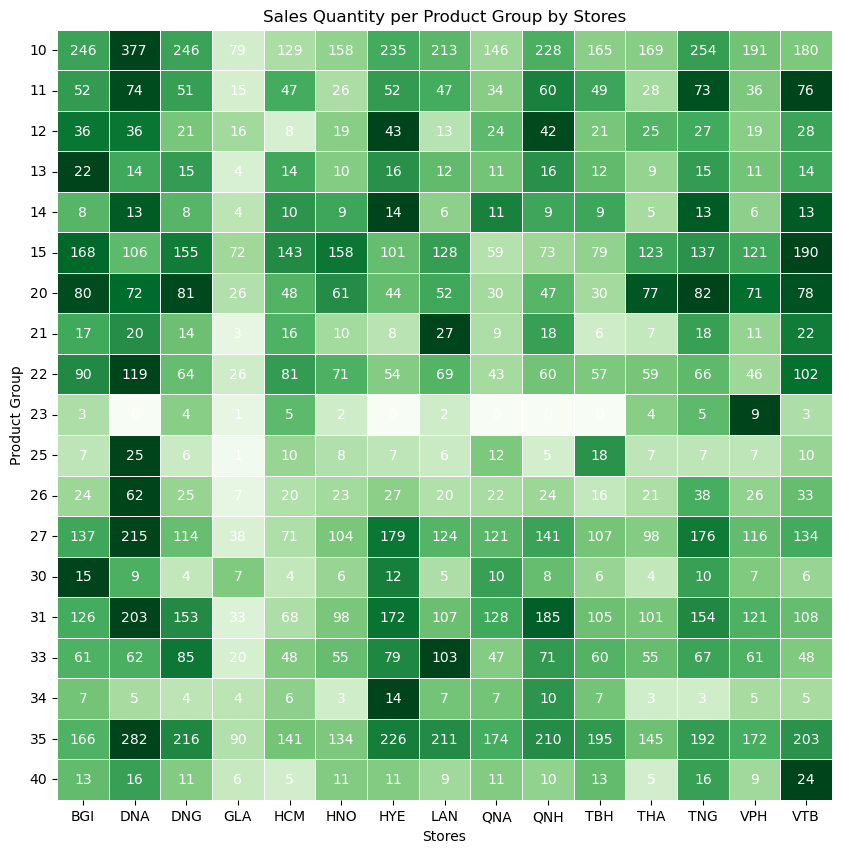

In [9]:
# Heatmap visualize Sales Quantity per Product Group by Stores

# Sales of product group by stores
product_group_sales = sales_data.pivot_table(index = 'product_group', columns = 'store', values ='quantity', 
                                             aggfunc = 'sum', fill_value = 0).reset_index()
product_group_sales['max_per_row'] = product_group_sales[stores].max(axis=1)

## Create Dataframe to write text on heatmap
plot_text = product_group_sales.iloc[:,:-1].copy()
plot_text = plot_text.set_index('product_group')


## Create Dataframe to draw blank heatmap
draw_plot = product_group_sales[['product_group', 'max_per_row']].copy()

for col in product_group_sales.columns[1:-1]:
    draw_plot[col] = product_group_sales[col] / product_group_sales['max_per_row']

    
draw_plot = draw_plot.drop(columns='max_per_row')
draw_plot = draw_plot.set_index('product_group')

## Combine together
plt.figure(figsize=(10, 10))
heatmap_plot = sns.heatmap(draw_plot, annot=False, cmap='Greens', linewidths=.5, cbar = False)
plt.yticks(rotation=0)

for i in range(len(plot_text)):
    for j in range(len(plot_text.columns)):
        heatmap_plot.text(j + 0.5, i + 0.5, plot_text.iloc[i, j], ha='center', va='center', color='white')


plt.title('Sales Quantity per Product Group by Stores')
plt.xlabel('Stores')
plt.ylabel('Product Group')

## Show plot
plt.show()

In [10]:
# Ranking stores by their sales of each "product_group"
product_group_sales['stores_sort_by_sales_group'] = product_group_sales[stores].apply(
                                                                lambda row: row.nlargest(len(stores)).index.to_list(), axis=1)
product_group_sales['stores_sort_by_sales_group'] = product_group_sales['stores_sort_by_sales_group'].apply(tuple)
stores_sort_by_product_group = product_group_sales[['product_group','stores_sort_by_sales_group']]
stores_sort_by_product_group

store,product_group,stores_sort_by_sales_group
0,10,"(DNA, TNG, BGI, DNG, HYE, QNH, LAN, VPH, VTB, ..."
1,11,"(VTB, DNA, TNG, QNH, BGI, HYE, DNG, TBH, HCM, ..."
2,12,"(HYE, QNH, BGI, DNA, VTB, TNG, THA, QNA, DNG, ..."
3,13,"(BGI, HYE, QNH, DNG, TNG, DNA, HCM, VTB, LAN, ..."
4,14,"(HYE, DNA, TNG, VTB, QNA, HCM, HNO, QNH, TBH, ..."
5,15,"(VTB, BGI, HNO, DNG, HCM, TNG, LAN, THA, VPH, ..."
6,20,"(TNG, DNG, BGI, VTB, THA, DNA, VPH, HNO, LAN, ..."
7,21,"(LAN, VTB, DNA, QNH, TNG, BGI, HCM, DNG, VPH, ..."
8,22,"(DNA, VTB, BGI, HCM, HNO, LAN, TNG, DNG, QNH, ..."
9,23,"(VPH, HCM, TNG, DNG, THA, BGI, VTB, HNO, LAN, ..."


#### Rank stores
I write a function to sort the stores. The stores are sorted in descending order of sales volume. If stores have the same sales volume, the secondary criterion is used, which is the list in the column stores_sort_by_sales_group.

In [11]:
# Merge "inventory_sales" and "product_group_sales".
stores_rank = product_sales.merge(stores_sort_by_product_group, on = 'product_group', how = 'left')

# Write a function to sort stores by their sales of each "product_code"
def sort_store(row):
    ## Sort stores that sell men clothes
    if row['product_line'] == 'M':
        sorted_shops = sorted(zip(men_stores, row[men_stores]), 
                              key=lambda x: (-x[1], row['stores_sort_by_sales_group'].index(x[0]) 
                                             if x[0] in row['stores_sort_by_sales_group'] else float('inf')
                                            ))
    ## Sort stores that sell women clothes 
    else:
        sorted_shops = sorted(zip(stores, row[stores]), 
                              key=lambda x: (-x[1], row['stores_sort_by_sales_group'].index(x[0]) 
                                             if x[0] in row['stores_sort_by_sales_group'] else float('inf')
                                            ))
    return [shop[0] for shop in sorted_shops]

stores_rank['stores_rank'] = stores_rank.apply(lambda row: sort_store(row), axis = 1).apply(tuple)
stores_rank = stores_rank[['product_code','stores_rank']]

stores_rank.head()


,product_code,stores_rank
0,10W7740,"(DNA, BGI, TNG, QNH, THA, LAN, VPH, VTB, DNG, ..."
1,10W7075,"(DNA, DNG, BGI, HYE, TNG, QNH, THA, HCM, GLA, ..."
2,20W4085,"(DNA, HYE, BGI, VPH, QNA, THA, DNG, HCM, VTB, ..."
3,31W3580,"(DNA, QNH, BGI, DNG, VTB, QNA, TNG, THA, HYE, ..."
4,31W3555,"(TNG, HYE, QNH, DNA, DNG, QNA, THA, LAN, HNO, ..."


## Calculations

In [12]:
# Convert "inventory_data" to Wide data by "size" 
size_of_product = inventory_data.pivot_table(index=['product_code','product_line','product_group'], 
                                             columns='size', values='total_inventory', fill_value=0, 
                                             aggfunc = 'sum').reset_index()
size_of_product['total_inventory'] = size_of_product[['1','2','3','4','5']].sum(axis = 1)

size_of_product.head(5)



size,product_code,product_line,product_group,1,2,3,4,5,total_inventory
0,10M5041,M,10,54,117,116,41,38,366
1,10M5222,M,10,16,28,22,12,10,88
2,10M5457,M,10,17,31,38,16,11,113
3,10M5493,M,10,16,31,26,14,5,92
4,10W3513,W,10,12,24,32,18,10,96


In [13]:
## Create "product_inventory" by merging "size_of_product" and "stores_rank"
product_inventory = size_of_product.merge(stores_rank, on = 'product_code', how = 'left')

## Create columns return stock rank by stock
product_inventory['1st_stock'] = product_inventory[['1','2','3','4','5']].apply(lambda row: row.max(), axis=1)
product_inventory['2nd_stock'] = product_inventory[['1','2','3','4','5']].apply(lambda row: row.nlargest(2).iloc[-1], axis=1)
product_inventory['3rd_stock'] = product_inventory[['1','2','3','4','5']].apply(lambda row: row.nlargest(3).iloc[-1], axis=1)
product_inventory['4th_stock'] = product_inventory[['1','2','3','4','5']].apply(lambda row: row.nlargest(4).iloc[-1], axis=1)
product_inventory['5th_stock'] = product_inventory[['1','2','3','4','5']].apply(lambda row: row.nlargest(5).iloc[-1], axis=1)

## Create columns return size rank by stock
product_inventory['1st_size'] = product_inventory[['1','2','3','4','5']].apply(lambda row: row.nlargest(1).index[0], axis=1)
product_inventory['2nd_size'] = product_inventory[['1','2','3','4','5']].apply(lambda row: row.nlargest(2).index[1], axis=1)
product_inventory['3rd_size'] = product_inventory[['1','2','3','4','5']].apply(lambda row: row.nlargest(3).index[2], axis=1)
product_inventory['4th_size'] = product_inventory[['1','2','3','4','5']].apply(lambda row: row.nlargest(4).index[3], axis=1)
product_inventory['5th_size'] = product_inventory[['1','2','3','4','5']].apply(lambda row: row.nlargest(5).index[4], axis=1)

product_inventory.head(5)

,product_code,product_line,product_group,1,2,3,4,5,total_inventory,stores_rank,1st_stock,2nd_stock,3rd_stock,4th_stock,5th_stock,1st_size,2nd_size,3rd_size,4th_size,5th_size
0,10M5041,M,10,54,117,116,41,38,366,"(DNG, BGI, LAN, TNG, THA, VPH, HCM, VTB, GLA, ...",117,116,54,41,38,2,3,1,4,5
1,10M5222,M,10,16,28,22,12,10,88,"(THA, DNG, LAN, TNG, HNO, VPH, VTB, GLA, BGI, ...",28,22,16,12,10,2,3,1,4,5
2,10M5457,M,10,17,31,38,16,11,113,"(TNG, DNG, VTB, THA, VPH, HNO, HCM, LAN, GLA, ...",38,31,17,16,11,3,2,1,4,5
3,10M5493,M,10,16,31,26,14,5,92,"(LAN, HNO, THA, TNG, BGI, VPH, DNG, VTB, GLA, ...",31,26,16,14,5,2,3,1,4,5
4,10W3513,W,10,12,24,32,18,10,96,"(DNA, VTB, DNG, BGI, THA, HYE, QNA, TBH, HCM, ...",32,24,18,12,10,3,2,4,1,5


#### Calculate size run of each Product code
A **size run** consists of all the sizes a particular product is manufactured in. Due to the lack of extra-sizes, I assume a complete size run includes the three sizes with the highest stock quantities. Normally, a size run could be S-M-L or M-L-XL. However, for some Product Codes, there is a significant difference between the 2nd highest stock quantity and the 3rd highest stock quantity. In that case, I consider the complete size run for these product codes to include just two sizes.

I create a `minimum` column to calculate the minimum size run of each Product Code. This means the value in the minimum column represents the minimum complete size run for that Product Code in system. I use values in the `3rd_stock` column to calculate the minimum size run. In some specific cases, as mentioned, I consider using values from the `2nd_stock` column or even the ``1st_stock`` column.

In [14]:
# Create a blank list
minimum = []

# Add values to list
for index, row in product_inventory.iterrows():
    if row['3rd_stock'] != 0:
        if row['2nd_stock']/ row['3rd_stock'] >= 3 or row['2nd_stock'] - row['3rd_stock'] > 15:
            minimum.append(row['2nd_stock'])
        else:
            minimum.append(row['3rd_stock'])
    elif row['3rd_stock'] == 0:
        if row['2nd_stock'] != 0 and row['1st_stock']/ row['2nd_stock'] <= 2:
            minimum.append(row['2nd_stock']) 
        else:
            minimum.append(row['1st_stock']) 

# Create column            
product_inventory['minimum'] = minimum

product_inventory.head()

,product_code,product_line,product_group,1,2,3,4,5,total_inventory,stores_rank,...,2nd_stock,3rd_stock,4th_stock,5th_stock,1st_size,2nd_size,3rd_size,4th_size,5th_size,minimum
0,10M5041,M,10,54,117,116,41,38,366,"(DNG, BGI, LAN, TNG, THA, VPH, HCM, VTB, GLA, ...",...,116,54,41,38,2,3,1,4,5,116
1,10M5222,M,10,16,28,22,12,10,88,"(THA, DNG, LAN, TNG, HNO, VPH, VTB, GLA, BGI, ...",...,22,16,12,10,2,3,1,4,5,16
2,10M5457,M,10,17,31,38,16,11,113,"(TNG, DNG, VTB, THA, VPH, HNO, HCM, LAN, GLA, ...",...,31,17,16,11,3,2,1,4,5,17
3,10M5493,M,10,16,31,26,14,5,92,"(LAN, HNO, THA, TNG, BGI, VPH, DNG, VTB, GLA, ...",...,26,16,14,5,2,3,1,4,5,16
4,10W3513,W,10,12,24,32,18,10,96,"(DNA, VTB, DNG, BGI, THA, HYE, QNA, TBH, HCM, ...",...,24,18,12,10,3,2,4,1,5,18


#### Calculate number of  distributed stores
In this step, I calculate the number of stores to be distributed using the **total_inventory** and **minimum** columns. For Product Codes with a small total inventory, I will gather them to distribute to a few stores. 

Additionally, there are 15 stores selling women's clothes and 10 stores selling men's clothes. Therefore, the maximum number of stores allocated according to the product line will be 15 for women's clothes and 10 for men's clothes.

In [15]:
# Create a blank list
gather_num = []

# Add values to list
for index, row in product_inventory.iterrows():
    if row['total_inventory'] <= 5:
        gather_num.append(1)
    elif row['total_inventory'] <= 12:
        gather_num.append(2)
    elif row['total_inventory'] <= 20:
        gather_num.append(3)
    elif row['product_line'] == 'M' and row['minimum'] >= len(men_stores):
        gather_num.append(len(men_stores))
    elif row['product_line'] == 'W' and row['minimum'] >= len(stores):
        gather_num.append(len(stores))
    else:
        gather_num.append(row['minimum'])

# Create column            
product_inventory['distribution_num'] = gather_num
product_inventory.head()

,product_code,product_line,product_group,1,2,3,4,5,total_inventory,stores_rank,...,3rd_stock,4th_stock,5th_stock,1st_size,2nd_size,3rd_size,4th_size,5th_size,minimum,distribution_num
0,10M5041,M,10,54,117,116,41,38,366,"(DNG, BGI, LAN, TNG, THA, VPH, HCM, VTB, GLA, ...",...,54,41,38,2,3,1,4,5,116,10
1,10M5222,M,10,16,28,22,12,10,88,"(THA, DNG, LAN, TNG, HNO, VPH, VTB, GLA, BGI, ...",...,16,12,10,2,3,1,4,5,16,10
2,10M5457,M,10,17,31,38,16,11,113,"(TNG, DNG, VTB, THA, VPH, HNO, HCM, LAN, GLA, ...",...,17,16,11,3,2,1,4,5,17,10
3,10M5493,M,10,16,31,26,14,5,92,"(LAN, HNO, THA, TNG, BGI, VPH, DNG, VTB, GLA, ...",...,16,14,5,2,3,1,4,5,16,10
4,10W3513,W,10,12,24,32,18,10,96,"(DNA, VTB, DNG, BGI, THA, HYE, QNA, TBH, HCM, ...",...,18,12,10,3,2,4,1,5,18,15


#### Determine how stocks are distributed
For Product Codes with low inventory and a small number of size run, I will gather these Product Codes to the best-selling stores. For Product Codes with large inventories, the priority is to balance the inventory by transferring excess products to stores that are lacking.

In [16]:
# Determine how stocks are distibuted
decision = []

for index, row in product_inventory.iterrows():
    if row['product_line'] == 'M' and row['distribution_num'] <= (len(men_stores) - 5):
        decision.append('gather')
    elif row['product_line'] == 'W' and row['distribution_num'] <= (len(stores) -  5):
        decision.append('gather')
    else:
        decision.append('balance')
        
product_inventory['decision'] = decision
product_inventory.head()

,product_code,product_line,product_group,1,2,3,4,5,total_inventory,stores_rank,...,4th_stock,5th_stock,1st_size,2nd_size,3rd_size,4th_size,5th_size,minimum,distribution_num,decision
0,10M5041,M,10,54,117,116,41,38,366,"(DNG, BGI, LAN, TNG, THA, VPH, HCM, VTB, GLA, ...",...,41,38,2,3,1,4,5,116,10,balance
1,10M5222,M,10,16,28,22,12,10,88,"(THA, DNG, LAN, TNG, HNO, VPH, VTB, GLA, BGI, ...",...,12,10,2,3,1,4,5,16,10,balance
2,10M5457,M,10,17,31,38,16,11,113,"(TNG, DNG, VTB, THA, VPH, HNO, HCM, LAN, GLA, ...",...,16,11,3,2,1,4,5,17,10,balance
3,10M5493,M,10,16,31,26,14,5,92,"(LAN, HNO, THA, TNG, BGI, VPH, DNG, VTB, GLA, ...",...,14,5,2,3,1,4,5,16,10,balance
4,10W3513,W,10,12,24,32,18,10,96,"(DNA, VTB, DNG, BGI, THA, HYE, QNA, TBH, HCM, ...",...,12,10,3,2,4,1,5,18,15,balance


#### Calculate the ideal stock quantity
Based on the `distribution_num` column and stock quantity in each size, I write a function to calculate the ideal stock quantity by size in each store. 

The outcome will be columns containing dictionaries with the size as the key and the stock quantity that should be stored as the value.

In [17]:
# Write function
def ideal_num(row, n):
    n = int(n)
    if row == 0:
        num = 0
    else:
        if math.floor(row/n) == 0:
            num = 1
        else:
            num = math.floor(row/n)
        
    return num

# Apply function to DataFrame
product_inventory['ideal_1st_size'] = product_inventory.apply(lambda row:{row['1st_size']:ideal_num(
                                                row['1st_stock'],row['distribution_num'])}, axis =1)
product_inventory['ideal_2nd_size'] = product_inventory.apply(lambda row:{row['2nd_size']:ideal_num(
                                                row['2nd_stock'],row['distribution_num'])}, axis =1)
product_inventory['ideal_3rd_size'] = product_inventory.apply(lambda row:{row['3rd_size']:ideal_num(
                                                row['3rd_stock'],row['distribution_num'])}, axis =1)
product_inventory['ideal_4th_size'] = product_inventory.apply(lambda row:{row['4th_size']:ideal_num(
                                                row['4th_stock'],row['distribution_num'])}, axis =1)
product_inventory['ideal_5th_size'] = product_inventory.apply(lambda row:{row['5th_size']:ideal_num(
                                                row['5th_stock'],row['distribution_num'])}, axis =1)
product_inventory.head()

,product_code,product_line,product_group,1,2,3,4,5,total_inventory,stores_rank,...,4th_size,5th_size,minimum,distribution_num,decision,ideal_1st_size,ideal_2nd_size,ideal_3rd_size,ideal_4th_size,ideal_5th_size
0,10M5041,M,10,54,117,116,41,38,366,"(DNG, BGI, LAN, TNG, THA, VPH, HCM, VTB, GLA, ...",...,4,5,116,10,balance,{'2': 11},{'3': 11},{'1': 5},{'4': 4},{'5': 3}
1,10M5222,M,10,16,28,22,12,10,88,"(THA, DNG, LAN, TNG, HNO, VPH, VTB, GLA, BGI, ...",...,4,5,16,10,balance,{'2': 2},{'3': 2},{'1': 1},{'4': 1},{'5': 1}
2,10M5457,M,10,17,31,38,16,11,113,"(TNG, DNG, VTB, THA, VPH, HNO, HCM, LAN, GLA, ...",...,4,5,17,10,balance,{'3': 3},{'2': 3},{'1': 1},{'4': 1},{'5': 1}
3,10M5493,M,10,16,31,26,14,5,92,"(LAN, HNO, THA, TNG, BGI, VPH, DNG, VTB, GLA, ...",...,4,5,16,10,balance,{'2': 3},{'3': 2},{'1': 1},{'4': 1},{'5': 1}
4,10W3513,W,10,12,24,32,18,10,96,"(DNA, VTB, DNG, BGI, THA, HYE, QNA, TBH, HCM, ...",...,1,5,18,15,balance,{'3': 2},{'2': 1},{'4': 1},{'1': 1},{'5': 1}


#### Determine which stores should be distributed
Based on the `store_rank` and `distribution_num` columns, I write a function to return lists of stores with high sales quantities. This means these stores should be fully stocked. 

The outcome will be dictionaries with the size as the key and the lists of stores as the value.

In [18]:
## Write funtjion
def get_top_rank(row,n):
    n = int(n)
    if isinstance(row, tuple):
        top = row[:n] if row[0] else []
    else:
        top = []
    return top


## Apply function to DataFrame
product_inventory['top_1_distribution'] = product_inventory.apply(lambda row: 
                                                                  {row['1st_size']:get_top_rank(row['stores_rank']
                                                                                                ,row['distribution_num'])}, axis = 1)
product_inventory['top_2_distribution'] = product_inventory.apply(lambda row: 
                                                                  {row['2nd_size']:get_top_rank(row['stores_rank'],
                                                                                                row['distribution_num'])}, axis = 1)
product_inventory['top_3_distribution'] = product_inventory.apply(lambda row: 
                                                                  {row['3rd_size']:get_top_rank(row['stores_rank'],
                                                                                                row['distribution_num'])}, axis = 1)
product_inventory['top_4_distribution'] = product_inventory.apply(lambda row: 
                                                                  {row['4th_size']:get_top_rank(row['stores_rank'],
                                                                                                row['4th_stock'])}, axis = 1)
product_inventory['top_5_distribution'] = product_inventory.apply(lambda row: 
                                                                  {row['5th_size']:get_top_rank(row['stores_rank'],
                                                                                                row['5th_stock'])}, axis = 1)
product_inventory.head()

,product_code,product_line,product_group,1,2,3,4,5,total_inventory,stores_rank,...,ideal_1st_size,ideal_2nd_size,ideal_3rd_size,ideal_4th_size,ideal_5th_size,top_1_distribution,top_2_distribution,top_3_distribution,top_4_distribution,top_5_distribution
0,10M5041,M,10,54,117,116,41,38,366,"(DNG, BGI, LAN, TNG, THA, VPH, HCM, VTB, GLA, ...",...,{'2': 11},{'3': 11},{'1': 5},{'4': 4},{'5': 3},"{'2': ('DNG', 'BGI', 'LAN', 'TNG', 'THA', 'VPH...","{'3': ('DNG', 'BGI', 'LAN', 'TNG', 'THA', 'VPH...","{'1': ('DNG', 'BGI', 'LAN', 'TNG', 'THA', 'VPH...","{'4': ('DNG', 'BGI', 'LAN', 'TNG', 'THA', 'VPH...","{'5': ('DNG', 'BGI', 'LAN', 'TNG', 'THA', 'VPH..."
1,10M5222,M,10,16,28,22,12,10,88,"(THA, DNG, LAN, TNG, HNO, VPH, VTB, GLA, BGI, ...",...,{'2': 2},{'3': 2},{'1': 1},{'4': 1},{'5': 1},"{'2': ('THA', 'DNG', 'LAN', 'TNG', 'HNO', 'VPH...","{'3': ('THA', 'DNG', 'LAN', 'TNG', 'HNO', 'VPH...","{'1': ('THA', 'DNG', 'LAN', 'TNG', 'HNO', 'VPH...","{'4': ('THA', 'DNG', 'LAN', 'TNG', 'HNO', 'VPH...","{'5': ('THA', 'DNG', 'LAN', 'TNG', 'HNO', 'VPH..."
2,10M5457,M,10,17,31,38,16,11,113,"(TNG, DNG, VTB, THA, VPH, HNO, HCM, LAN, GLA, ...",...,{'3': 3},{'2': 3},{'1': 1},{'4': 1},{'5': 1},"{'3': ('TNG', 'DNG', 'VTB', 'THA', 'VPH', 'HNO...","{'2': ('TNG', 'DNG', 'VTB', 'THA', 'VPH', 'HNO...","{'1': ('TNG', 'DNG', 'VTB', 'THA', 'VPH', 'HNO...","{'4': ('TNG', 'DNG', 'VTB', 'THA', 'VPH', 'HNO...","{'5': ('TNG', 'DNG', 'VTB', 'THA', 'VPH', 'HNO..."
3,10M5493,M,10,16,31,26,14,5,92,"(LAN, HNO, THA, TNG, BGI, VPH, DNG, VTB, GLA, ...",...,{'2': 3},{'3': 2},{'1': 1},{'4': 1},{'5': 1},"{'2': ('LAN', 'HNO', 'THA', 'TNG', 'BGI', 'VPH...","{'3': ('LAN', 'HNO', 'THA', 'TNG', 'BGI', 'VPH...","{'1': ('LAN', 'HNO', 'THA', 'TNG', 'BGI', 'VPH...","{'4': ('LAN', 'HNO', 'THA', 'TNG', 'BGI', 'VPH...","{'5': ('LAN', 'HNO', 'THA', 'TNG', 'BGI')}"
4,10W3513,W,10,12,24,32,18,10,96,"(DNA, VTB, DNG, BGI, THA, HYE, QNA, TBH, HCM, ...",...,{'3': 2},{'2': 1},{'4': 1},{'1': 1},{'5': 1},"{'3': ('DNA', 'VTB', 'DNG', 'BGI', 'THA', 'HYE...","{'2': ('DNA', 'VTB', 'DNG', 'BGI', 'THA', 'HYE...","{'4': ('DNA', 'VTB', 'DNG', 'BGI', 'THA', 'HYE...","{'1': ('DNA', 'VTB', 'DNG', 'BGI', 'THA', 'HYE...","{'5': ('DNA', 'VTB', 'DNG', 'BGI', 'THA', 'HYE..."


## Create Stock Level Data Frame
We have all things we need: the ideal stock quantity of each size for each product, the list of stores that need to be distributed, and distribution methods (gather or balance). Let's synthesize them all into a unified Data Frame.

In [19]:
# Convert "inventory_data" to Long data
inventory_melt = inventory_data.melt(id_vars = ['product_code','size'], value_vars = stores, 
                                     var_name = 'store',value_name = 'stock')
inventory_melt.head()

,product_code,size,store,stock
0,10W7740,2,BGI,14
1,10W7075,2,BGI,11
2,20W4085,2,BGI,10
3,10W7740,3,BGI,10
4,10W7075,3,BGI,10


In [20]:
# Extract "Ideal stock quantity"
ideal_stock = product_inventory.melt(id_vars = 'product_code',
                                         value_vars = ['ideal_1st_size','ideal_2nd_size',
                                                       'ideal_3rd_size','ideal_4th_size','ideal_5th_size']
                                    )

ideal_stock['size'] = ideal_stock['value'].apply(lambda x: next(iter(x.keys())))
ideal_stock['ideal_stock'] = ideal_stock['value'].apply(lambda x: next(iter(x.values())))
ideal_stock = ideal_stock[['product_code','size','ideal_stock']]
ideal_stock.head()

,product_code,size,ideal_stock
0,10M5041,2,11
1,10M5222,2,2
2,10M5457,3,3
3,10M5493,2,3
4,10W3513,3,2


In [21]:
# Extract "Store distribution"
stores_distribution = product_inventory.melt(id_vars = 'product_code', 
                                             value_vars = ['top_1_distribution','top_2_distribution','top_3_distribution',
                                                           'top_4_distribution','top_5_distribution']
                                            )
stores_distribution['size'] = stores_distribution['value'].apply(lambda x: next(iter(x.keys())))
stores_distribution['stores_distribution'] = stores_distribution['value'].apply(lambda x: next(iter(x.values())))
stores_distribution = stores_distribution[['product_code','size','stores_distribution']]
stores_distribution.head()

,product_code,size,stores_distribution
0,10M5041,2,"(DNG, BGI, LAN, TNG, THA, VPH, HCM, VTB, GLA, ..."
1,10M5222,2,"(THA, DNG, LAN, TNG, HNO, VPH, VTB, GLA, BGI, ..."
2,10M5457,3,"(TNG, DNG, VTB, THA, VPH, HNO, HCM, LAN, GLA, ..."
3,10M5493,2,"(LAN, HNO, THA, TNG, BGI, VPH, DNG, VTB, GLA, ..."
4,10W3513,3,"(DNA, VTB, DNG, BGI, THA, HYE, QNA, TBH, HCM, ..."


In [22]:
# Create "product_type" DataFrame
product_type = product_inventory[['product_code','decision']]
product_type.head()

,product_code,decision
0,10M5041,balance
1,10M5222,balance
2,10M5457,balance
3,10M5493,balance
4,10W3513,balance


In [23]:
# Merge "inventory_melt", "ideal_stock", "stores_distribution" and "product_type"
stock_level = inventory_melt.merge(
                                ideal_stock, on = ['product_code','size'], how = 'left').merge(
                                stores_distribution, on = ['product_code','size'], how = 'left').merge(
                                product_type, on = 'product_code', how = 'left')
stock_level.head()

,product_code,size,store,stock,ideal_stock,stores_distribution,decision
0,10W7740,2,BGI,14,12,"(DNA, BGI, TNG, QNH, THA, LAN, VPH, VTB, DNG, ...",balance
1,10W7075,2,BGI,11,11,"(DNA, DNG, BGI, HYE, TNG, QNH, THA, HCM, GLA, ...",balance
2,20W4085,2,BGI,10,11,"(DNA, HYE, BGI, VPH, QNA, THA, DNG, HCM, VTB, ...",balance
3,10W7740,3,BGI,10,10,"(DNA, BGI, TNG, QNH, THA, LAN, VPH, VTB, DNG, ...",balance
4,10W7075,3,BGI,10,10,"(DNA, DNG, BGI, HYE, TNG, QNH, THA, HCM, GLA, ...",balance


#### Create Sending Data Frame

I create a Data Frame containing products that can be sent to other stores. I apply the following conditions to filter from the stock_level Data Frame:

- When the store is not on the distribution list and has a stock level greater than 0.
- When the store is on the distribution list and the inventory is greater than the ideal stock level.

After creating the Data Frame, I calculate the number of products that could be sent.

- For balance-products: If the store is on the distribution list, the quantity transferred will be the excess quantity compared to the ideal inventory level. If the store is not on the distribution list, keep 1 product so the store still has the opportunity to sell.
- For gather-products: If the store is on the distribution list, the quantity transferred will be the excess quantity compared to the ideal inventory level. If the store is not on the distribution list, transfer all inventory.

In [24]:
# Create DataFrame contains transfered-products in stores
send_stores_list = []

for index, row in stock_level.iterrows():
    if row['store'] not in row['stores_distribution'] and row['stock'] > 0 :
        send_stores_list.append(row)
    elif row['store'] in row['stores_distribution'] and row['stock'] > row['ideal_stock']:
        send_stores_list.append(row)

send_stores = pd.DataFrame(send_stores_list)


# Create "Sending quantity" column
send_quantity = []

for index, row in send_stores.iterrows():
    if row['decision'] == 'balance':
        if row['store'] in row['stores_distribution']:
            send_quantity.append(row['stock'] - row['ideal_stock'])
        else:
             send_quantity.append(row['stock'] - 1)
    else:
        if row['store'] in row['stores_distribution']:
            send_quantity.append(row['stock'] - row['ideal_stock'])
        else:
            send_quantity.append(row['stock'])

send_stores['send_quantity'] = send_quantity
send_stores = send_stores[send_stores['send_quantity'] != 0]
send_stores = send_stores.reset_index(drop = True)
send_stores

,product_code,size,store,stock,ideal_stock,stores_distribution,decision,send_quantity
0,10W7740,2,BGI,14,12,"(DNA, BGI, TNG, QNH, THA, LAN, VPH, VTB, DNG, ...",balance,2
1,20W4085,1,BGI,10,8,"(DNA, HYE, BGI, VPH, QNA, THA, DNG, HCM, VTB, ...",balance,2
2,11W8979,1,BGI,11,7,"(VTB, DNA, VPH, QNH, BGI, HYE, HNO, DNG, TBH, ...",balance,4
3,27W7702,2,BGI,11,7,"(HYE, TNG, VTB, QNA, DNA, THA, QNH, VPH, LAN, ...",balance,4
4,31W3580,3,BGI,9,7,"(DNA, QNH, BGI, DNG, VTB, QNA, TNG, THA, HYE, ...",balance,2
...,...,...,...,...,...,...,...,...
2567,33W6777,1,VTB,1,1,"(DNG,)",gather,1
2568,34W8540,2,VTB,1,1,"(HYE,)",gather,1
2569,34W8540,4,VTB,1,1,"(HYE,)",gather,1
2570,35W4437,4,VTB,1,1,"(DNA,)",gather,1


#### Create Receiving Data Frame

I create a Data Frame containing missing products that need to be replenished in stores. I apply the following condition to filter from the stock_level Data Frame:

- When the store is on the distribution list and has inventory lower than the ideal inventory level.

Then, I create a column to calculate the amount of stock that can be received.

In [25]:
# Create DataFrame contains stores will receive products from 'send_stores'
receive_stores = stock_level[(stock_level.apply(lambda row: row['store'] in row['stores_distribution'], axis = 1))
                            & (stock_level['stock']< stock_level['ideal_stock'])].reset_index(drop = True)

# Create "Receivingquantity" column
receive_stores['receive_quantity'] = receive_stores['ideal_stock'] - receive_stores['stock']
receive_stores


,product_code,size,store,stock,ideal_stock,stores_distribution,decision,receive_quantity
0,20W4085,2,BGI,10,11,"(DNA, HYE, BGI, VPH, QNA, THA, DNG, HCM, VTB, ...",balance,1
1,31W3580,2,BGI,9,10,"(DNA, QNH, BGI, DNG, VTB, QNA, TNG, THA, HYE, ...",balance,1
2,31W3555,2,BGI,8,9,"(TNG, HYE, QNH, DNA, DNG, QNA, THA, LAN, HNO, ...",balance,1
3,11W8040,1,BGI,3,8,"(TNG, HYE, HCM, BGI, VTB, DNA, DNG, QNA, VPH, ...",balance,5
4,10M5041,2,BGI,8,11,"(DNG, BGI, LAN, TNG, THA, VPH, HCM, VTB, GLA, ...",balance,3
...,...,...,...,...,...,...,...,...
2838,15W7728,3,VTB,0,1,"(VTB,)",gather,1
2839,15W7750,2,VTB,0,1,"(VTB,)",gather,1
2840,22W7484,5,VTB,0,1,"(VTB,)",gather,1
2841,35W7483,1,VTB,0,1,"(VTB,)",gather,1


#### Split Sending and Receiving Data Frame by stores

In [26]:
# Sending Data Frame
for store in send_stores['store'].unique():
    globals()[f'{store}_send'] = send_stores[send_stores['store'] == store].copy().reset_index(drop=True)


# Receiving Data Frame
for store in receive_stores['store'].unique():
    globals()[f'{store}_receive'] = receive_stores[receive_stores['store'] == store].copy().reset_index(drop=True)

## Transfering functions

I write functions to help quickly create transfer orders between stores.

### transfer_raw()

This function allows me to create a Data Frame that merges all records from the Sending Store and Receiving tore and calculates the transfer quantity of each size for each Product Code. 

While calculating the transfer quantity, to improve efficiency when gathering in stores, I assume that the Receiving stores can hold 3 units more than the ideal inventory quantity of the gather-products from stores not in the distribution list. Because most of the gather-products are at stores that are not on the list and have inventory levels of 1 or 2 products (based on the plot below). This ensures that gather products can be quickly gathered to stores after each transfer.

In [27]:
def transfer_raw(send_store, receive_store):
    df = send_store.merge(receive_store, on =['product_code','size','ideal_stock','stores_distribution','decision']
                            , how = 'outer', suffixes = ['_send','_receive']).fillna(0)
    
    transfer_quantity = []
    
    for index, row in df.iterrows():
        if row['store_send'] != 0 and row['store_receive'] != 0:
            if row['decision'] == 'gather' and row['store_send'] not in row['stores_distribution']:
                if row['send_quantity'] <= row['receive_quantity'] + 3:
                    transfer_quantity.append(row['send_quantity'])
                else:
                    transfer_quantity.append(row['receive_quantity'] + 3)
            else:
                if row['send_quantity'] <= row['receive_quantity']:
                    transfer_quantity.append(row['send_quantity'])
                else:
                    transfer_quantity.append(row['receive_quantity'])
        else:
            transfer_quantity.append(0)
    
    df['transfer_quantity'] = transfer_quantity
    df['send_stock_after_transfer'] = df['send_quantity'] - df['transfer_quantity']
    df['receive_stock_after_transfer'] = df['receive_quantity'] - df['transfer_quantity']
    
    return df

**Ex**:

In [28]:
send_receive = transfer_raw(send_stores, receive_stores)
send_receive.head(10)

,product_code,size,store_send,stock_send,ideal_stock,stores_distribution,decision,send_quantity,store_receive,stock_receive,receive_quantity,transfer_quantity,send_stock_after_transfer,receive_stock_after_transfer
0,10W7740,2,BGI,14.0,12,"(DNA, BGI, TNG, QNH, THA, LAN, VPH, VTB, DNG, ...",balance,2.0,GLA,11.0,1.0,1.0,1.0,0.0
1,10W7740,2,BGI,14.0,12,"(DNA, BGI, TNG, QNH, THA, LAN, VPH, VTB, DNG, ...",balance,2.0,HNO,11.0,1.0,1.0,1.0,0.0
2,10W7740,2,BGI,14.0,12,"(DNA, BGI, TNG, QNH, THA, LAN, VPH, VTB, DNG, ...",balance,2.0,QNH,11.0,1.0,1.0,1.0,0.0
3,10W7740,2,BGI,14.0,12,"(DNA, BGI, TNG, QNH, THA, LAN, VPH, VTB, DNG, ...",balance,2.0,TBH,11.0,1.0,1.0,1.0,0.0
4,10W7740,2,BGI,14.0,12,"(DNA, BGI, TNG, QNH, THA, LAN, VPH, VTB, DNG, ...",balance,2.0,THA,10.0,2.0,2.0,0.0,0.0
5,10W7740,2,BGI,14.0,12,"(DNA, BGI, TNG, QNH, THA, LAN, VPH, VTB, DNG, ...",balance,2.0,VPH,11.0,1.0,1.0,1.0,0.0
6,10W7740,2,DNA,17.0,12,"(DNA, BGI, TNG, QNH, THA, LAN, VPH, VTB, DNG, ...",balance,5.0,GLA,11.0,1.0,1.0,4.0,0.0
7,10W7740,2,DNA,17.0,12,"(DNA, BGI, TNG, QNH, THA, LAN, VPH, VTB, DNG, ...",balance,5.0,HNO,11.0,1.0,1.0,4.0,0.0
8,10W7740,2,DNA,17.0,12,"(DNA, BGI, TNG, QNH, THA, LAN, VPH, VTB, DNG, ...",balance,5.0,QNH,11.0,1.0,1.0,4.0,0.0
9,10W7740,2,DNA,17.0,12,"(DNA, BGI, TNG, QNH, THA, LAN, VPH, VTB, DNG, ...",balance,5.0,TBH,11.0,1.0,1.0,4.0,0.0


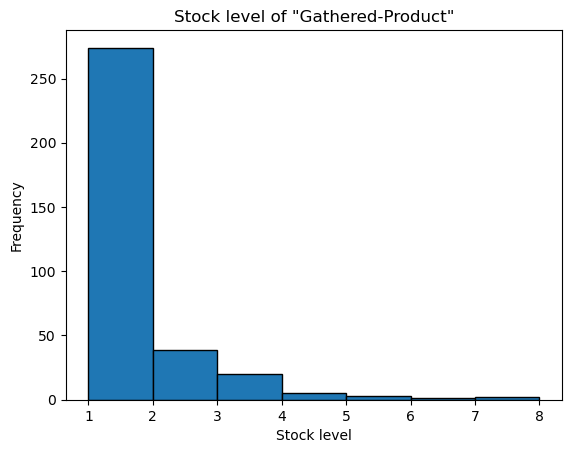

In [29]:
# Histogram plot shows frequency of Stock level of products that need to be gathered
gather_histogram = send_stores[(send_stores['decision'] == 'gather') 
                                & (send_stores.apply(lambda row: row['store'] not in row['stores_distribution'], axis = 1))]

plt.hist(gather_histogram['send_quantity'], bins=7, edgecolor='black')
plt.xlabel('Stock level')
plt.ylabel('Frequency')
plt.title('Stock level of "Gathered-Product"')
plt.show()

### transfer()

It help removing unnecessary columns and “0” values to create a complete transfer order.

In [30]:
def transfer(send_store, receive_store):
    df_raw = transfer_raw(send_store, receive_store)
    
    df = df_raw[df_raw['transfer_quantity'] > 0]
    df = df[['product_code','size','store_send','store_receive','transfer_quantity']]
    
    return df

**Ex**:

In [31]:
send_receive = transfer(send_stores, receive_stores)
send_receive.head(10)

,product_code,size,store_send,store_receive,transfer_quantity
0,10W7740,2,BGI,GLA,1.0
1,10W7740,2,BGI,HNO,1.0
2,10W7740,2,BGI,QNH,1.0
3,10W7740,2,BGI,TBH,1.0
4,10W7740,2,BGI,THA,2.0
5,10W7740,2,BGI,VPH,1.0
6,10W7740,2,DNA,GLA,1.0
7,10W7740,2,DNA,HNO,1.0
8,10W7740,2,DNA,QNH,1.0
9,10W7740,2,DNA,TBH,1.0


### after_send() and after_receive()

Because sending and receiving Data Frames can still continue to participate in transfers with other stores, I continue writing the functions **after_send** and **after_receive** to recalculate the remaining number of products that can be sent and received, and to delete products that cannot be further transferred or have received enough products.

In [32]:
# Function to process "Sending Store" after transfering
def after_send(send_store, receive_store):
    df_raw = transfer_raw(send_store, receive_store)
    
    df = df_raw[(df_raw['store_send'] != 0) & (df_raw['send_stock_after_transfer'] > 0)]
    df = df[['product_code','size','store_send','send_stock_after_transfer',
             'ideal_stock','stores_distribution','decision']]
    df = df.rename(columns = {'store_send':'store','send_stock_after_transfer':'send_quantity'})
    
    return df

# Function to process "Receiving Store" after transfering
def after_receive(send_store, receive_store):
    df_raw = transfer_raw(send_store, receive_store)
    
    df = df_raw[(df_raw['store_receive'] != 0) & (df_raw['receive_stock_after_transfer'] > 0)]
    df = df[['product_code','size','store_receive','receive_stock_after_transfer',
             'ideal_stock','stores_distribution','decision']]
    df = df.rename( columns = {'store_receive':'store','receive_stock_after_transfer':'receive_quantity'})
    
    return df

**Ex**:

In [33]:
after_send_stores = after_send(send_stores, receive_stores)
after_send_stores.head(10)

,product_code,size,store,send_quantity,ideal_stock,stores_distribution,decision
0,10W7740,2,BGI,1.0,12,"(DNA, BGI, TNG, QNH, THA, LAN, VPH, VTB, DNG, ...",balance
1,10W7740,2,BGI,1.0,12,"(DNA, BGI, TNG, QNH, THA, LAN, VPH, VTB, DNG, ...",balance
2,10W7740,2,BGI,1.0,12,"(DNA, BGI, TNG, QNH, THA, LAN, VPH, VTB, DNG, ...",balance
3,10W7740,2,BGI,1.0,12,"(DNA, BGI, TNG, QNH, THA, LAN, VPH, VTB, DNG, ...",balance
5,10W7740,2,BGI,1.0,12,"(DNA, BGI, TNG, QNH, THA, LAN, VPH, VTB, DNG, ...",balance
6,10W7740,2,DNA,4.0,12,"(DNA, BGI, TNG, QNH, THA, LAN, VPH, VTB, DNG, ...",balance
7,10W7740,2,DNA,4.0,12,"(DNA, BGI, TNG, QNH, THA, LAN, VPH, VTB, DNG, ...",balance
8,10W7740,2,DNA,4.0,12,"(DNA, BGI, TNG, QNH, THA, LAN, VPH, VTB, DNG, ...",balance
9,10W7740,2,DNA,4.0,12,"(DNA, BGI, TNG, QNH, THA, LAN, VPH, VTB, DNG, ...",balance
10,10W7740,2,DNA,3.0,12,"(DNA, BGI, TNG, QNH, THA, LAN, VPH, VTB, DNG, ...",balance


In [34]:
after_receive_stores = after_receive(send_stores, receive_stores)
after_receive_stores.head(10)

,product_code,size,store,receive_quantity,ideal_stock,stores_distribution,decision
34,10W7740,2,THA,1.0,12,"(DNA, BGI, TNG, QNH, THA, LAN, VPH, VTB, DNG, ...",balance
36,20W4085,1,GLA,1.0,8,"(DNA, HYE, BGI, VPH, QNA, THA, DNG, HCM, VTB, ...",balance
37,20W4085,1,HCM,2.0,8,"(DNA, HYE, BGI, VPH, QNA, THA, DNG, HCM, VTB, ...",balance
41,20W4085,1,HCM,1.0,8,"(DNA, HYE, BGI, VPH, QNA, THA, DNG, HCM, VTB, ...",balance
44,20W4085,1,GLA,2.0,8,"(DNA, HYE, BGI, VPH, QNA, THA, DNG, HCM, VTB, ...",balance
45,20W4085,1,HCM,3.0,8,"(DNA, HYE, BGI, VPH, QNA, THA, DNG, HCM, VTB, ...",balance
47,20W4085,1,TBH,1.0,8,"(DNA, HYE, BGI, VPH, QNA, THA, DNG, HCM, VTB, ...",balance
48,20W4085,1,GLA,2.0,8,"(DNA, HYE, BGI, VPH, QNA, THA, DNG, HCM, VTB, ...",balance
49,20W4085,1,HCM,3.0,8,"(DNA, HYE, BGI, VPH, QNA, THA, DNG, HCM, VTB, ...",balance
51,20W4085,1,TBH,1.0,8,"(DNA, HYE, BGI, VPH, QNA, THA, DNG, HCM, VTB, ...",balance


### result()

Finally, to quickly check the transfer results, I write the function **result** to calculate the total number of transferred products.

In [35]:
def result(send_store, receive_store):
    df = transfer(send_store, receive_store)
    
    x = sum(df['transfer_quantity'])
    
    return print(x)

**Ex**:

In [36]:
result(send_stores, receive_stores)

15867.0


## Visualizations

Now we have enough tools to transfer products between stores. However, it is difficult to decide which stores to transfer products to, how many products to transfer, and the priority order of stores for distribution. Because the source of transferable products and the resources used to move goods are limited, priority should be given to filling stores with good sales performance within the system. To solve this problem, I use plots to quickly make decisions about moving products between stores.

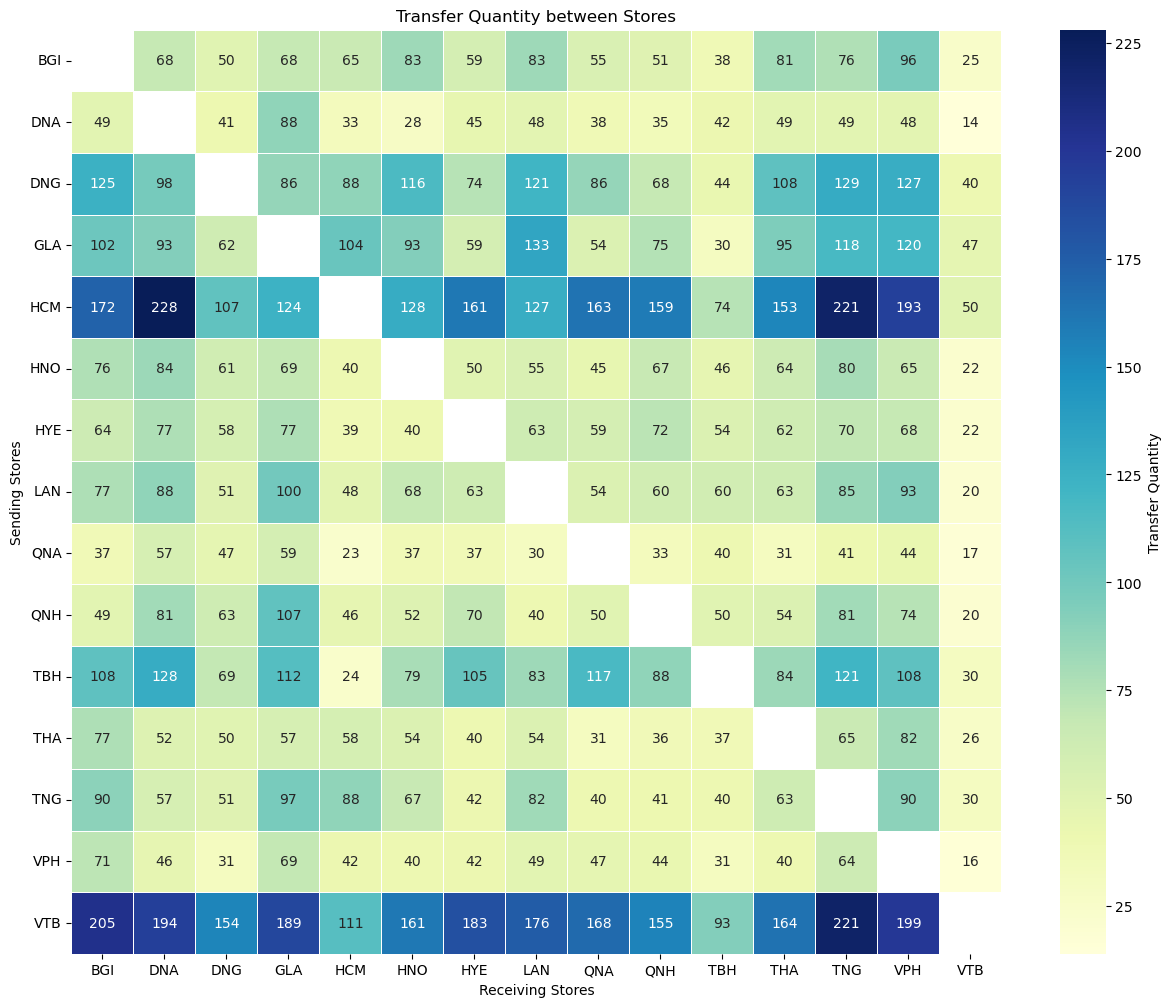

In [37]:
# Heatmap plot shows transfer quantity between stores
send_receive = transfer(send_stores, receive_stores)

heatmap_matrix = send_receive.pivot_table(index = 'store_send', columns = 'store_receive', 
                                           values = 'transfer_quantity', aggfunc = 'sum')

## Draw plot
plt.figure(figsize=(15, 12))
sns.heatmap(heatmap_matrix, annot=True, cmap='YlGnBu', fmt='g', linewidths=.5, cbar_kws={'label': 'Transfer Quantity'})

## Add labels and title
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.title('Transfer Quantity between Stores')
plt.xlabel('Receiving Stores')
plt.ylabel('Sending Stores')
## Show plot
plt.show()

In this plot, I can quickly decide which transfer pairs will be optimal based on the total quantity for each transfer.

>For example: I can choose the **HCM** or **VTB** store to transfer goods the receiving store **DNA**, instead of other stores with lower efficiency. Additionally, I can identify stores that have a large number of transferable products, which means these stores are holding more inventory than others.

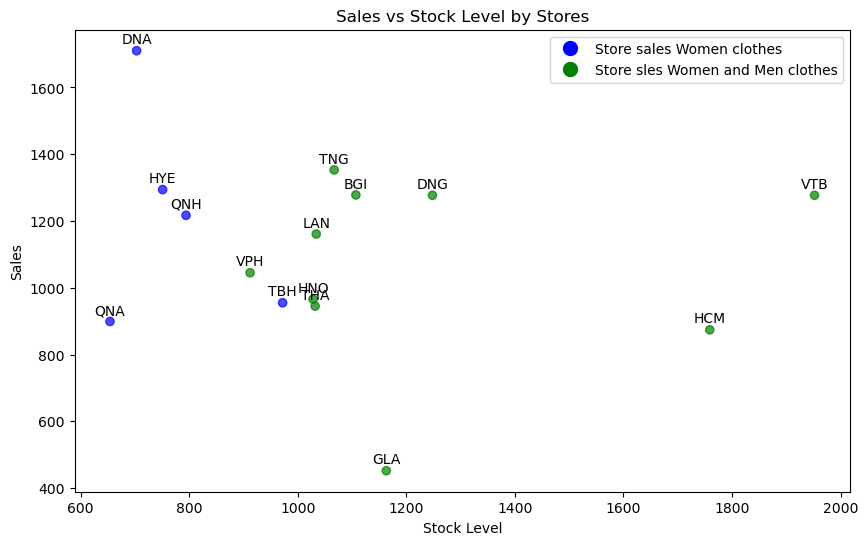

In [38]:
# Scater plot shows Sales vs Stock level by Stores
inventory_group = inventory_melt.groupby(by = 'store').agg({'stock':'sum'}).reset_index()
sales_group = sales_data.groupby(by = 'store').agg({'quantity':'sum'}).reset_index()
sales_and_inventory = inventory_group.merge(sales_group, on = 'store', how = 'left')


## Define colors for each store group
stores_sale_women_only = [ x for x in stores if x not in men_stores]
stores_sale_women_and_men = [ x for x in stores if x in men_stores]

colors = []
for store in sales_and_inventory['store']:
    if store in stores_sale_women_only:
        colors.append('blue')
    elif store in stores_sale_women_and_men:
        colors.append('green')

# Draw Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(sales_and_inventory['stock'], sales_and_inventory['quantity'], c=colors, alpha=0.7)

## Add labels and title
plt.ylabel('Sales')
plt.xlabel('Stock Level')
plt.title('Sales vs Stock Level by Stores')

## Add annotations for each data point
for i, txt in enumerate(sales_and_inventory['store']):
    plt.annotate(txt, (sales_and_inventory['stock'].iloc[i], sales_and_inventory['quantity'].iloc[i]), 
                 textcoords="offset points", xytext=(0,5), ha='center')

## Create legend labels
legend_labels = {
    'Store sales Women clothes': 'blue',
    'Store sles Women and Men clothes': 'green',
    }

handles = [plt.Line2D([], [], marker='o', markersize=10, color=color, linestyle='None', label=label) 
           for label, color in legend_labels.items()]
plt.legend(handles=handles)

## Show plot
plt.show()

In this plot, I can observe which store is performing the best in sales, which store needs to be restocked, and which store is holding too much inventory compared to its sales capacity.

>For example: The **DNA** store has the best sales but a low inventory level, so it should be prioritized for restocking. Conversely, the **VTB** and **HCM** stores have average sales but are holding nearly double the inventory compared to other stores in the same segment, so their excess inventory should be redistributed to optimize resources.

## Perform transfering

I pair the stores to create Data Frames for sending and receiving. By using the functions above, I can quickly perform the transfer. Here is an example of how I work:

In [39]:
TBH_DNA = transfer(TBH_send, DNA_receive)
TBH_send_1 = after_send(TBH_send, DNA_receive)
DNA_receive_1 = after_receive(TBH_send, DNA_receive)
result(TBH_send, DNA_receive)

128.0


- Use the **transfer** function to create a transfer DataFrame. I name the transferred DataFrame according to the structure "SendingStore_ReceivingStore".

- I reprocess the sent and received DataFrames using the functions **after_send** and **after_receive**. I number them to distinguish them from the original DataFrames.

- The **result** function helps me quickly check the number of transfers. If the number of transfers is reasonable, I save the DataFrames and repeat the process with other pairs of stores.

In [40]:
TBH_HYE = transfer(TBH_send_1, HYE_receive)
TBH_send_2 = after_send(TBH_send_1, HYE_receive)
HYE_receive_1 = after_receive(TBH_send_1, HYE_receive)
result(TBH_send_1, HYE_receive)

84.0


**...**

## Create Transfering Order

In [41]:
# Concatenate the send-receive DataFrames into a unified DataFrame
transfer_table = pd.DataFrame()
for send_store in stores:
    for receive_store in stores:
        if send_store != receive_store:
            name = f"{send_store}_{receive_store}"
            if name in locals():
                transfer_table = pd.concat([transfer_table, locals()[name]], ignore_index=True)
                
transfer_table

,product_code,size,store_send,store_receive,transfer_quantity
0,11W8040,2,TBH,DNA,1.0
1,11W8003,3,TBH,DNA,1.0
2,11W8979,2,TBH,DNA,3.0
3,10W7418,1,TBH,DNA,1.0
4,30W7053,2,TBH,DNA,1.0
...,...,...,...,...,...
148,40W7213,5,TBH,HYE,1.0
149,31W3521,5,TBH,HYE,1.0
150,33W6744,3,TBH,HYE,1.0
151,15W7759,2,TBH,HYE,1.0


## Conclusion

By using Python, I can easily create transfering orders between stores. Python helps process large amounts of data from sales tables and inventory tables, saving time on data preparation and reducing manual operations, thereby improving performance. By analyzing historical sales data, Python helps make accurate decisions, optimizes resource allocation, ensures stores operate efficiently, and limits waste from unsold goods.